<a href="https://colab.research.google.com/github/patelruday/Machine_learning/blob/main/House_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("OM NAMO NARAYANA THANK YOU GOD")


OM NAMO NARAYANA THANK YOU GOD


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import pickle
import sklearn
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/bengaluru_house_prices.csv")

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.shape

(13320, 9)

In [ ]:
#first of all select and drop those colunns which are not so effective to calculate price,if you look carefully yoe will find that
# columns such as area_tye,availability,sociaty,and balcony  are not so involved in calculating for price ,so we can drop these columns.

data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [ ]:
data.shape

(13320, 5)

In [ ]:
data.isna().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


#Now start data preprocessing

In [ ]:
#Check for null values or missing data

#there are 16 missing in size,column and 1 in location columns , 73 in bath ,so we can ignore as thre are aprox 13000 rows ,so we delete thes rows
data.dropna(inplace=True)
print(data.shape)

(13246, 5)


In [ ]:
data.isna().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
data.shape

(13246, 5)

In [ ]:
# till here we have done following exercise
# removed 4 columns which are less required in price calculation.
# removed all missing valued rows.
# removed all rows for duplicated value
# at this stage our data shape is (12365,5)


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


# Now first focus on 'size ' column

In [ ]:
# check total no of items in size column
data1=data.copy()
data1['size'].value_counts()
# extract first no of size string
data1['bhk']=data1['size'].apply(lambda x: int(x.split(" ")[0]))

In [ ]:
data1=data1.drop(columns=['size'])

In [ ]:
data1.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [ ]:
data1.shape

(13246, 5)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 620.9+ KB


In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
data1[~data1['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [ ]:
def convert(x):
    z=x.split('-')
    if len(z)==2:
        y=(float(z[0])+float(z[1]))/2
        return y
    try:
        return float(x)
    except:
        return None





In [ ]:
# conver all object values in total_sqft column to float
data2=data1.copy()

In [ ]:
data2['total_sqft']=data2['total_sqft'].apply(convert)

In [ ]:
data2.shape

(13246, 5)

In [ ]:
data3=data2.copy()

In [ ]:
# add a column of per_sqft_price
data3['per_sqft_price']=(data3['price']/data3['total_sqft'])*100000

In [ ]:
data3.head()

,location,total_sqft,bath,price,bhk,per_sqft_price
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
# work on 'location ' column, remove all location <10
data4=data3.copy()

In [ ]:
data4['location']=data4['location'].apply(lambda x: x.strip())

In [ ]:
location_stats=data4.groupby('location')['location'].agg('count').sort_values(ascending=False)


In [ ]:
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [ ]:
location_stats_less_10=location_stats[location_stats<=10]


In [ ]:
location_stats_less_10

,location
location,
Basapura,10
1st Block Koramangala,10
Gunjur Palya,10
Kalkere,10
Sector 1 HSR Layout,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [ ]:
data4['location']=data4['location'].apply(lambda x:'others' if x in location_stats_less_10 else x  )

In [ ]:
len(data4.location.unique())

242

In [ ]:
data4.shape

(13246, 6)

In [ ]:
#outlier detection an removal
data5=data4.copy()


In [ ]:
data6=data5[~(data5['total_sqft']/data5['bhk']<300)]

In [ ]:
data6.shape

(12502, 6)

In [ ]:
def remove_outlier_ppsft(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.per_sqft_price)
        std=np.std(subdf.per_sqft_price)
        reduced_df=subdf[((subdf.per_sqft_price)>(m-std)) & ((subdf.per_sqft_price)<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out



In [ ]:
data7=remove_outlier_ppsft(data6)
data7.shape

(10241, 6)

In [ ]:
data7['per_sqft_price'].skew()

2.1931179903741236

In [ ]:
data7.per_sqft_price.describe()

,per_sqft_price
count,10241.000000
mean,5657.702572
std,2266.476980
min,1250.000000
25%,4244.762955
50%,5172.413793
75%,6426.099852
max,24509.803922


In [ ]:
def plot_scatter(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]

    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3bhk',s=50)

    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.legend()

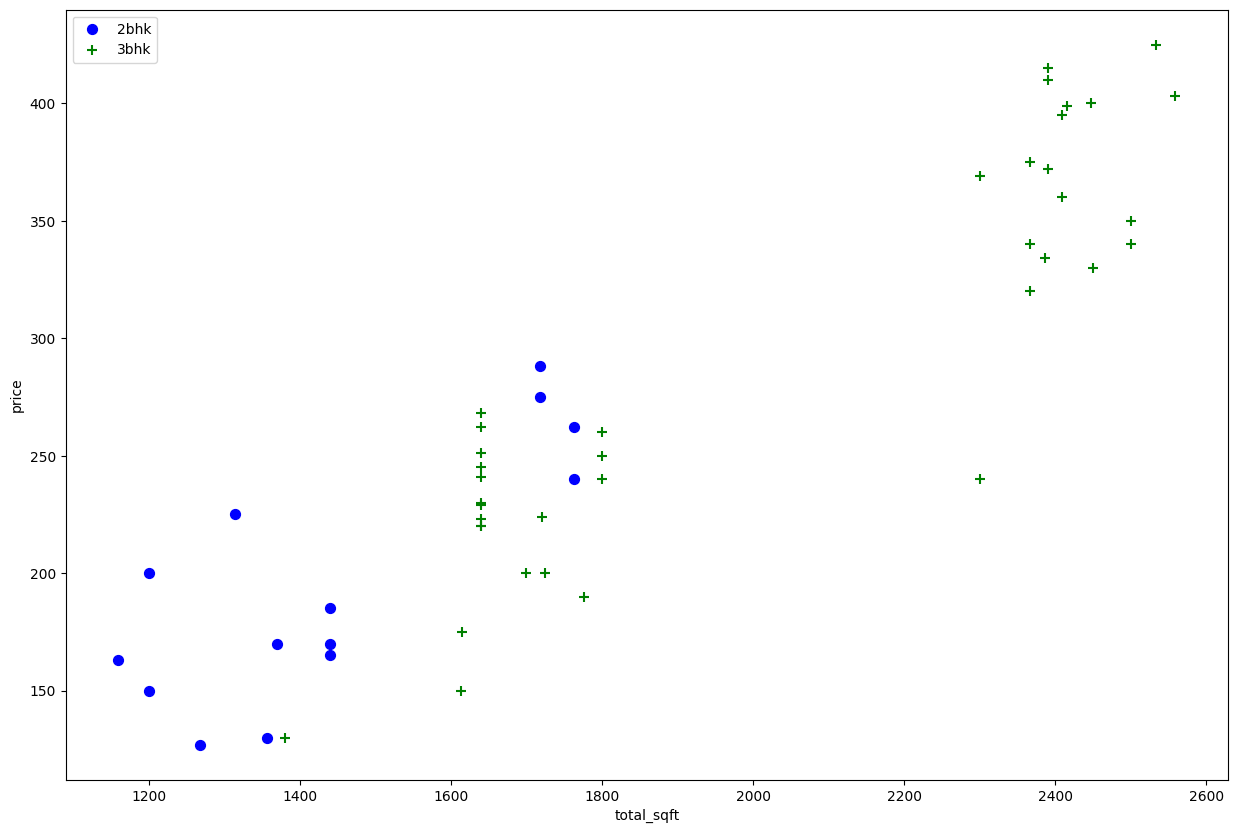

In [ ]:
plot_scatter(data7,'Rajaji Nagar')

In [ ]:
data7.shape


(10241, 6)

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.per_sqft_price),
                'std' :np.std(bhk_df.per_sqft_price),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.per_sqft_price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [ ]:
data8=remove_bhk_outliers(data7)


In [ ]:
data8.shape

(7329, 6)

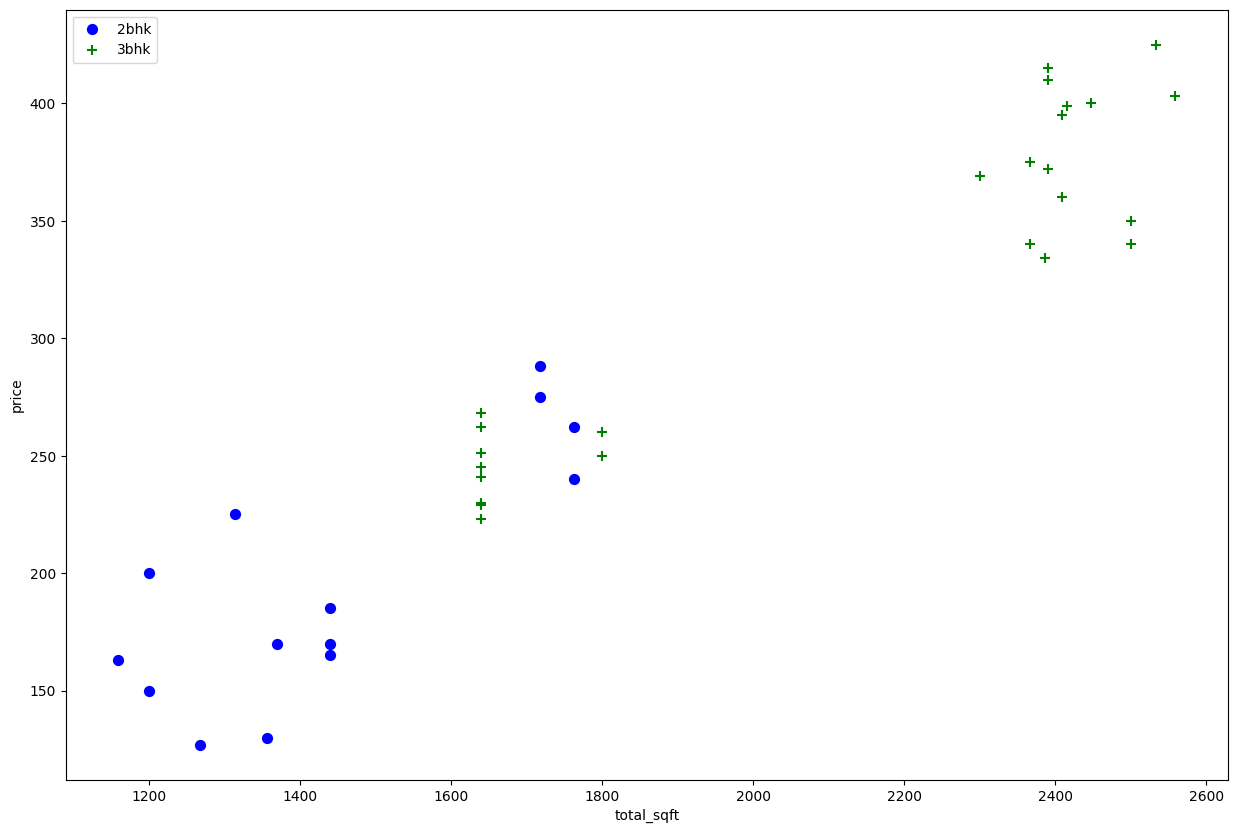

In [ ]:
plot_scatter(data8,'Rajaji Nagar')

In [ ]:
data9=data8.copy()
data9=data9[data9.bath<data9.bhk+2]

In [ ]:
data9.head()

,location,total_sqft,bath,price,bhk,per_sqft_price
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [ ]:
data10=data9.copy()
data10=data10.drop(columns=['per_sqft_price'],axis=1)

In [ ]:
data10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
len(dict(data10['location'].value_counts()))

242

In [ ]:
data10.reset_index(inplace=True,drop=True)

In [ ]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7251 non-null   object 
 1   total_sqft  7251 non-null   float64
 2   bath        7251 non-null   float64
 3   price       7251 non-null   float64
 4   bhk         7251 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 283.4+ KB


In [ ]:
dummies=pd.get_dummies(data10.location)


In [ ]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data11=pd.concat([data10,dummies.drop('others',axis=1)],axis=1)

In [ ]:
data11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data12=data11.drop(['location'],axis=1)

In [ ]:
data12.shape

(7251, 245)

In [ ]:
data12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X=data12.drop(['price'],axis=1)

In [ ]:
X.shape

(7251, 244)

In [ ]:
y=data12['price']

In [ ]:
y.shape

(7251,)

In [ ]:
len(X.columns)

244

In [ ]:
Xn=np.array(X)

In [ ]:
yn=np.array(y)

In [ ]:
yn

array([428., 194., 235., ..., 110.,  26., 400.])

In [ ]:
7251*.80

5800.8

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xn,yn,test_size=.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8452277697874329

In [ ]:
lr_model.score(X_train,y_train)

0.8541850010771193

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=.2,random_state=0)
cross_val_score(lr_model,X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [ ]:
# write prediction function for linear regression
def predict_home_price(location,sqft,bath,bhk):
    lock_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if lock_index>=0:
        x[lock_index]=1

    return lr_model.predict([x])[0]

In [ ]:
predict_home_price('Banashankari',1300,2,3)

71.02820938986964

In [ ]:

with open('banglore_house_price_new_2','wb') as f:
    pickle.dump(lr_model,f)

In [ ]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('column_2.json','w') as f:
    f.write(json.dumps(columns))

In [ ]:
print(sklearn.__version__)

1.3.2
